### Домашняя работа. Пахомов Иван 

In [143]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns


### Задание 1

### Пункт А

In [197]:
n = 10
lh = []

for i in range(1, 1000):
    if n == 1:
        lh.append(0)
    else:
        l = 1
        for j in range(1, n-1):
            l *= (i - j) / i
        l *= (n - 1) / i
        lh.append(l)

In [198]:
np.argmax(lh)

41

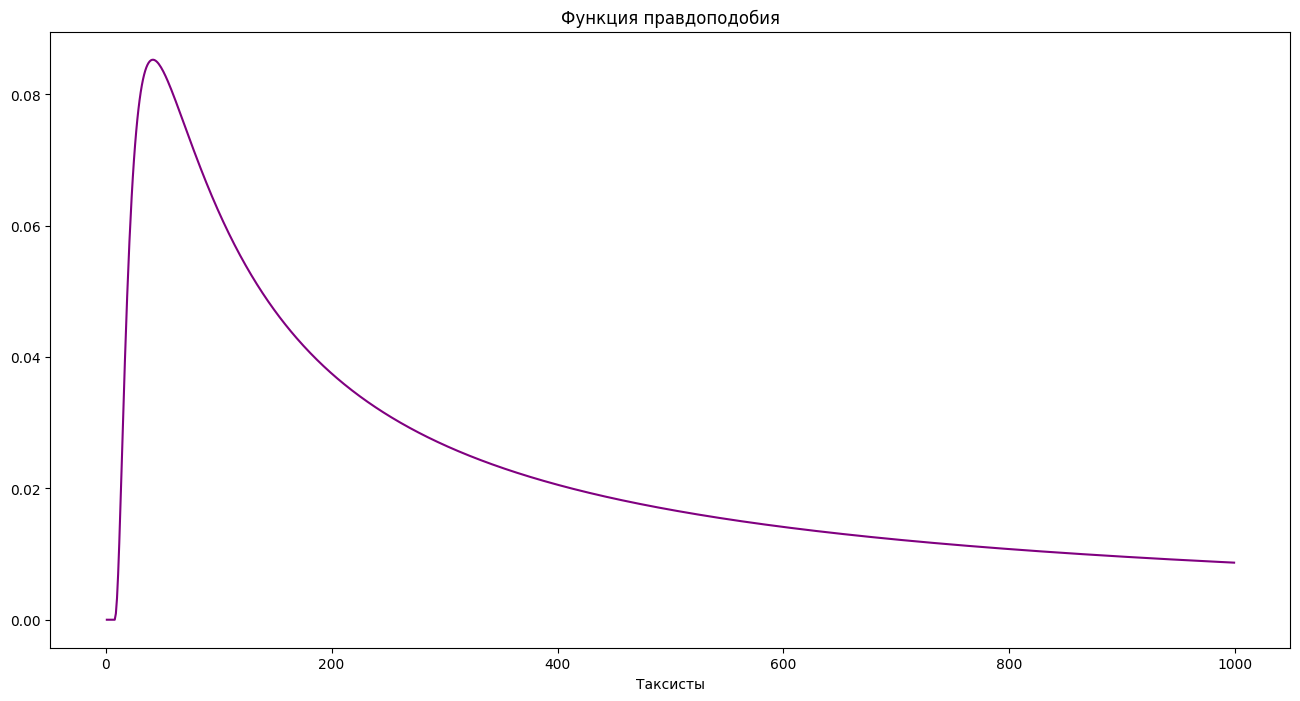

In [284]:
plt.figure(figsize = (16, 8))
plt.plot(np.arange(1, 1000), lh, color='purple')
plt.title('Функция правдоподобия')
plt.xlabel('Таксисты');

Ответ: оценка числа n: 42

### Пункт Б

In [321]:
E = []
for i in range(1, 1001):
    e = 0
    for j in range(1, 1001):
        l = 1
        if k == 1:
            l = 1
        else:
            for z in range(1, j-1):
                l *= (i-z)/i
            l *= (j-1)/i
            e+=(j*l)
    E.append(e)

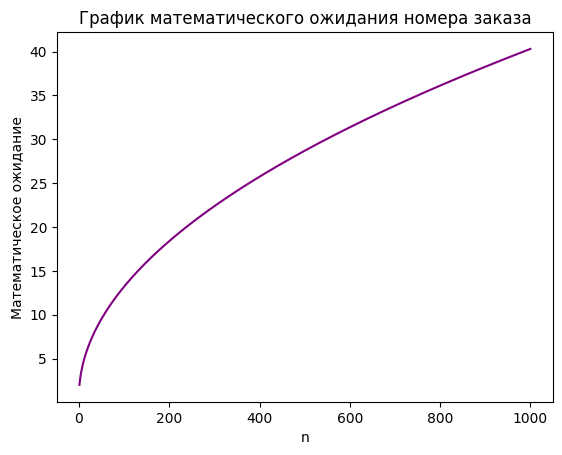

In [323]:
plt.plot(range(1, 1001), E, color='purple')
plt.title('График математического ожидания номера заказа')
plt.xlabel('n')
plt.ylabel('Математическое ожидание');

In [326]:
print('Оценка n методом моментов:', np.argmin(np.abs(np.array(E)-10))+1)

Оценка n методом моментов: 55


### Задание 3

In [283]:
np.random.seed(227)

true_mean = 1

count_classic = count_bootstrap = count_bootstrap_t = 0
sample = sts.expon.rvs(scale=1, size=(10000, 20))
for i in sample:
    # Классический асимптотический нормальный интервал
    mean = np.mean(i)
    std = np.std(i)
    se = std / np.sqrt(20)
    lower_classic, upper_classic = mean - 1.96 * se, mean + 1.96 * se
    
    # Наивный бутстрэп
    bootstrap_samples = np.random.choice(i.flatten(), size=(10000, 20), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    lower_bootstrap, upper_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
    
    # Бутстрэп t-статистики
    t_statistic = (bootstrap_means - mean) / (std / np.sqrt(20))
    CI = mean - np.percentile(t_statistic, [97.5, 2.5]) * (std / np.sqrt(20))
    lower_bootstrap_t = CI[0]
    upper_bootstrap_t = CI[1]
    
    if lower_classic <= true_mean <= upper_classic:
        count_classic += 1
    if lower_bootstrap <= true_mean <= upper_bootstrap:
        count_bootstrap += 1
    if lower_bootstrap_t <= true_mean <= upper_bootstrap_t:
        count_bootstrap_t += 1

# Вычисление вероятностей
prob_classic = count_classic / 10000
prob_bootstrap = count_bootstrap / 10000
prob_bootstrap_t = count_bootstrap_t / 10000

print("Вероятность попадания в классический асимптотический интервал:", prob_classic)
print("Вероятность попадания в интервал с помощью наивного бутстрэпа:", prob_bootstrap)
print("Вероятность попадания в интервал с помощью бутстрэпа t-статистики:", prob_bootstrap_t)


Вероятность попадания в классический асимптотический интервал: 0.8958
Вероятность попадания в интервал с помощью наивного бутстрэпа: 0.9024
Вероятность попадания в интервал с помощью бутстрэпа t-статистики: 0.8817


In [282]:
np.random.seed(227)

true_mean = 0

count_classic = count_bootstrap = count_bootstrap_t = 0
sample = t.rvs(df=3, size=(10000, 20))
for i in sample:
    # Классический асимптотический нормальный интервал
    mean = np.mean(i)
    std = np.std(i)
    se = std / np.sqrt(20)
    lower_classic, upper_classic = mean - 1.96 * se, mean + 1.96 * se
    
    # Наивный бутстрэп
    bootstrap_samples = np.random.choice(i.flatten(), size=(10000, 20), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    lower_bootstrap, upper_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
    
    # Бутстрэп t-статистики
    t_statistic = (bootstrap_means - mean) / (std / np.sqrt(20))
    CI = mean - np.percentile(t_statistic, [97.5, 2.5]) * (std / np.sqrt(20))
    lower_bootstrap_t = CI[0]
    upper_bootstrap_t = CI[1]
    
    if lower_classic <= true_mean <= upper_classic:
        count_classic += 1
    if lower_bootstrap <= true_mean <= upper_bootstrap:
        count_bootstrap += 1
    if lower_bootstrap_t <= true_mean <= upper_bootstrap_t:
        count_bootstrap_t += 1

# Вычисление вероятностей
prob_classic = count_classic / 10000
prob_bootstrap = count_bootstrap / 10000
prob_bootstrap_t = count_bootstrap_t / 10000

print("Вероятность попадания в классический асимптотический интервал:", prob_classic)
print("Вероятность попадания в интервал с помощью наивного бутстрэпа:", prob_bootstrap)
print("Вероятность попадания в интервал с помощью бутстрэпа t-статистики:", prob_bootstrap_t)


Вероятность попадания в классический асимптотический интервал: 0.935
Вероятность попадания в интервал с помощью наивного бутстрэпа: 0.9194
Вероятность попадания в интервал с помощью бутстрэпа t-статистики: 0.9426


### Пункт В

В первом случае лучше всего себя показали классический доверительный интервал и наивный бутстрэп, во втором - доверительный интервал и бутстрэп t-статистики

### Задание 4

In [243]:
data = pd.read_csv('/Users/ivanpakhomov/Desktop/22-23_hse_probability - Exam.csv')

In [244]:
data

,num,Last name,Name,Mail,info_1,info_2,info_3,bpip,prepod,Вариант,...,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
0,NaN,NaN,Желтый,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Голубой,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,14.0
2,NaN,NaN,Зеленый,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,21.0
3,NaN,NaN,Оранжевый,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,11.0,33.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,14.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,328,Сенников,Александр -,asennikov@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,KZ,бп,Пильник,3.0,...,NaN,19.0,NaN,19,5,NaN,NaN,NaN,NaN,NaN
333,329,Ся,Юйцянь -,yusya@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,CN,бп,NaN,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,NaN,NaN,NaN
334,330,Сятова,Альфия -,asyatova@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 3 cou...,KZ,бп,NaN,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,NaN,NaN,NaN
335,331,Темиркулов,Дастан Автандилович,datemirkulov@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,KG,бп,NaN,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,NaN,NaN,NaN


In [245]:
data.drop(labels = [0, 1, 2, 3, 4],axis = 0, inplace=True)

In [246]:
results = data['Unnamed: 72'].to_numpy()

In [247]:
data = data.rename(columns={'Unnamed: 72': 'Results'})

In [249]:
data

,num,Last name,Name,Mail,info_1,info_2,info_3,bpip,prepod,Вариант,...,Unnamed: 71,Results,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
5,1,Репенкова,Полина Александровна,parepenkova@edu.hse.ru,351118027,3668903494,NaN,ип,Демешев,4.0,...,NaN,16.0,NaN,16,4,NaN,NaN,5.0,17.0,61.0
6,2,Ролдугина,Софья Александровна,saroldugina@edu.hse.ru,351118027,1705654528,NaN,ип,Демешев,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,6.0,20.0,45.0
7,3,Сафина,Алия Линаровна,alsafina@edu.hse.ru,351118027,5096071996,NaN,ип,Демешев,3.0,...,NaN,19.0,NaN,19,5,NaN,NaN,7.0,23.0,38.0
8,4,Сидоров,Иван Максимович,imsidorov@edu.hse.ru,351118027,4361493219,NaN,ип,Демешев,4.0,...,NaN,26.0,NaN,26,8,NaN,NaN,8.0,25.0,24.0
9,5,Солоухин,Иван Владимирович,ivsoloukhin@edu.hse.ru,351118027,1705636488,NaN,ип,Демешев,4.0,...,NaN,21.0,NaN,21,6,NaN,NaN,9.0,27.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,328,Сенников,Александр -,asennikov@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,KZ,бп,Пильник,3.0,...,NaN,19.0,NaN,19,5,NaN,NaN,NaN,NaN,NaN
333,329,Ся,Юйцянь -,yusya@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,CN,бп,NaN,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,NaN,NaN,NaN
334,330,Сятова,Альфия -,asyatova@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 3 cou...,KZ,бп,NaN,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,NaN,NaN,NaN
335,331,Темиркулов,Дастан Автандилович,datemirkulov@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,KG,бп,NaN,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,NaN,NaN,NaN


In [250]:
data_vowel = data[data['Last name'].str.contains('А|У|О|Ы|И|Э|Я|Ю|Ё|Е')]

In [251]:
data_vowel

,num,Last name,Name,Mail,info_1,info_2,info_3,bpip,prepod,Вариант,...,Unnamed: 71,Results,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
22,18,Адилхан,Санжар -,sadilkhan@edu.hse.ru,351118027,3684796035,NaN,ип,Коссова,2.0,...,NaN,25.0,NaN,25,8,NaN,NaN,NaN,NaN,NaN
23,19,Алексанян,Алек Давидович,adaleksanyan@edu.hse.ru,351118027,5089504263,NaN,ип,Коссова,4.0,...,NaN,26.0,NaN,26,8,NaN,NaN,NaN,NaN,NaN
37,33,Охотин,Даниил Васильевич,dvokhotin@edu.hse.ru,351118027,3671978477,NaN,ип,Коссова,4.0,...,NaN,25.0,NaN,25,8,NaN,NaN,NaN,NaN,NaN
50,46,Аврамчук,Аркадий Андреевич,aaavramchuk@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,RU,бп,Пильник,4.0,...,NaN,29.0,NaN,29,10,NaN,NaN,NaN,NaN,NaN
51,47,Авсеенко,Мириса Михайловна,mmavseenko@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,RU,бп,Пильник,3.0,...,NaN,26.0,NaN,26,8,NaN,NaN,NaN,NaN,NaN
52,48,Адамокова,Лиана Юрьевна,lyuadamokova@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,RU,бп,Пильник,4.0,...,NaN,20.0,NaN,20,6,NaN,NaN,NaN,NaN,NaN
53,49,Адамцева,Мария Андреевна,maadamtseva@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,RU,бп,Пильник,2.0,...,NaN,19.0,NaN,19,5,NaN,NaN,NaN,NaN,NaN
54,50,Азаров,Артем Владимирович,avazarov@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,RU,бп,Пильник,3.0,...,NaN,24.0,NaN,24,7,NaN,NaN,NaN,NaN,NaN
55,51,Алексеева,Екатерина Игоревна,eialekseeva_2@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,RU,бп,Пильник,1.0,...,NaN,25.0,NaN,25,8,NaN,NaN,NaN,NaN,NaN
56,52,Афанасьев,Максим Дмитриевич,mdafanasev@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,RU,бп,Пильник,1.0,...,NaN,28.0,NaN,28,9,NaN,NaN,NaN,NaN,NaN


In [252]:
data_consonant = data[~data['Last name'].str.contains('А|У|О|Ы|И|Э|Я|Ю|Ё|Е')]

In [253]:
data_consonant

,num,Last name,Name,Mail,info_1,info_2,info_3,bpip,prepod,Вариант,...,Unnamed: 71,Results,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
5,1,Репенкова,Полина Александровна,parepenkova@edu.hse.ru,351118027,3668903494,NaN,ип,Демешев,4.0,...,NaN,16.0,NaN,16,4,NaN,NaN,5.0,17.0,61.0
6,2,Ролдугина,Софья Александровна,saroldugina@edu.hse.ru,351118027,1705654528,NaN,ип,Демешев,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,6.0,20.0,45.0
7,3,Сафина,Алия Линаровна,alsafina@edu.hse.ru,351118027,5096071996,NaN,ип,Демешев,3.0,...,NaN,19.0,NaN,19,5,NaN,NaN,7.0,23.0,38.0
8,4,Сидоров,Иван Максимович,imsidorov@edu.hse.ru,351118027,4361493219,NaN,ип,Демешев,4.0,...,NaN,26.0,NaN,26,8,NaN,NaN,8.0,25.0,24.0
9,5,Солоухин,Иван Владимирович,ivsoloukhin@edu.hse.ru,351118027,1705636488,NaN,ип,Демешев,4.0,...,NaN,21.0,NaN,21,6,NaN,NaN,9.0,27.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,327,Савенкова,Софья Дмитриевна,sdsavenkova@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,RU,бп,NaN,1.0,...,NaN,4.0,NaN,4,1,NaN,NaN,NaN,NaN,NaN
332,328,Сенников,Александр -,asennikov@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,KZ,бп,Пильник,3.0,...,NaN,19.0,NaN,19,5,NaN,NaN,NaN,NaN,NaN
333,329,Ся,Юйцянь -,yusya@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 2 cou...,CN,бп,NaN,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,NaN,NaN,NaN
334,330,Сятова,Альфия -,asyatova@edu.hse.ru,факультет экономических наук; Б 38.03.01 Э 201...,Faculty of Economic Sciences; Economics; 3 cou...,KZ,бп,NaN,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,NaN,NaN,NaN


### Пункт А

In [254]:
from scipy.stats import ttest_ind

In [255]:
n1 = 49
mean1 = data_vowel['Results'].mean()
std1 = data_vowel['Results'].std()

n2 = 283
mean2 = data_consonant['Results'].mean()
std2 = data_consonant['Results'].std()

t_stat, p_value = sts.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)

In [256]:
p_value

0.39740271538438365

In [257]:
ttest_ind(data_vowel['Results'], data_consonant['Results'], equal_var=False)

Ttest_indResult(statistic=-0.8519661870595602, pvalue=0.3974027153843839)

### Пункт Б

In [258]:
num_bootstrap = 1000

bootstrap_stats1 = []
bootstrap_stats2 = []

for i in range(num_bootstrap):
    bootstrap_sample1 = np.random.choice(data_vowel['Results'], size=n1, replace=True)
    bootstrap_sample2 = np.random.choice(data_consonant['Results'], size=n2, replace=True)
    stat1 = np.mean(bootstrap_sample1)  
    stat2 = np.mean(bootstrap_sample2)  
    bootstrap_stats1.append(stat1)
    bootstrap_stats2.append(stat2)

diff_stats = np.array(bootstrap_stats1) - np.array(bootstrap_stats2)

observed_stat = np.mean(data_vowel['Results']) - np.mean(data_consonant['Results']) 
p_value = (np.abs(diff_stats) >= np.abs(observed_stat)).mean()

p_value


0.543

### Пункт В

In [259]:
from scipy.stats import t

In [260]:
n1 = 49
mean1 = data_vowel['Results'].mean()
std1 = data_vowel['Results'].std()

n2 = 283
mean2 = data_consonant['Results'].mean()
std2 = data_consonant['Results'].std()

In [261]:
bootstrap_stats1 = []
bootstrap_stats2 = []
b_t_s = []
for i in range(1000):
    bootstrap_sample1 = np.random.choice(data_vowel['Results'], size=n1, replace=True)
    bootstrap_sample2 = np.random.choice(data_consonant['Results'], size=n2, replace=True)
    stat1 = np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2)
    stat2 = np.std(bootstrap_sample1) - np.std(bootstrap_sample2)
    bootstrap_stats1.append(stat1)
    bootstrap_stats2.append(stat2)
    
    b_t = stat1 / np.sqrt(stat2**2/n1 + stat2**2/n2)
    b_t_s.append(b_t)

observed_stat = np.mean(data_vowel['Results']) - np.mean(data_consonant['Results'])
observed_std = np.sqrt(np.var(data_vowel['Results'])/n1 + np.var(data_consonant['Results'])/n2)
p_value = (np.abs(np.array(b_t_s) >= np.abs(observed_stat / observed_std)).mean())

print("P-значение:", p_value)

P-значение: 0.165


### Пункт Г

In [262]:
mixed = data_vowel['Results'].to_list() + data_consonant['Results'].to_list()

In [263]:
new_diffs = []
for i in range(10000):
    np.random.shuffle(mixed)
    new_vowel = mixed[:len(data_vowel['Results'].to_list())]
    new_consonant = mixed[len(data_vowel['Results'].to_list()):]
    new_diff = np.mean(new_vowel) - np.mean(new_consonant)
    new_diffs.append(new_diff)
p_value = (np.abs(new_diffs) >= np.abs(observed_stat)).mean()

In [264]:
p_value

0.379

Вывод: нет оснований отвергать гипотезу H_0 (все пункты)

### Задание 5

### Пункт А

In [265]:
data_vowel_g = data_vowel.loc[data_vowel['Results'] > data['Results'].median()]

In [266]:
data_vowel_b = data_vowel.loc[data_vowel['Results'] <= data['Results'].median()]

In [267]:
data_consonant_g = data_consonant.loc[data_consonant['Results'] > data['Results'].median()]

In [268]:
data_consonant_b = data_consonant.loc[data_consonant['Results'] <= data['Results'].median()]

In [269]:
a = data_consonant_g.shape[0] 
b = data_consonant_b.shape[0]
c = data_vowel_g.shape[0]   
d = data_vowel_b.shape[0] 

odds_a = a * d
odds_c = b * c

log_odds_ratio = np.log(odds_a / odds_c)

se = np.sqrt(1/a + 1/b + 1/c + 1/d)

interval = (np.exp(log_odds_ratio - 1.96 * se), np.exp(log_odds_ratio + 1.96 * se))

z_statistic = log_odds_ratio / se
p_value = 2 * (1 - sts.norm.cdf(np.abs(z_statistic)))

print("95% асимптотический интервал:", interval)
print("P-значение:", p_value)

95% асимптотический интервал: (0.7597444386480954, 2.5833769194978795)
P-значение: 0.280180274566451


### Пункт Б

In [270]:
odds_a = a / (a + b)
odds_c = c / (c+ d)

log_odds_ratio = np.log(odds_a / odds_c)

se = np.sqrt(1/(a+b) + 1/(c+d))

interval = (np.exp(log_odds_ratio - 1.96 * se), np.exp(log_odds_ratio + 1.96 * se))

z_statistic = log_odds_ratio / se
p_value = 2 * (1 - sts.norm.cdf(np.abs(z_statistic)))

print("95% асимптотический интервал:", interval)
print("P-значение:", p_value)

95% асимптотический интервал: (0.8827719576818895, 1.619079504464307)
P-значение: 0.24843407914401494


### Пункт В

In [274]:
med = data['Results'].median()

In [278]:
rs = []
for i in range(1000):
    new_vowel = data_vowel.sample(frac=1, replace=True)
    new_consonant = data_consonant.sample(frac=1, replace=True)
    v_g = new_vowel[new_vowel['Results'] > med].shape[0]
    v_b = new_vowel[new_vowel['Results'] <= med].shape[0]
    
    c_g = new_consonant[new_consonant['Results'] > med].shape[0]
    c_b = new_consonant[new_consonant['Results'] <= med].shape[0]
    
    r = (c_g/c_b/(v_g/v_b))
    rs.append(r)
observed = (a/b)/(c/d)
lower_bound = np.percentile(rs, 2.5)
upper_bound = np.percentile(rs, 97.5)
p_value = (np.abs(np.array(rs)) >= np.abs(observed)).mean()

In [279]:
print('Доверительный интервал', (lower_bound, upper_bound))

Доверительный интервал (0.7516339869281046, 2.630025445292621)


In [280]:
p_value

0.493

Вывод: нет оснований отвергать гипотезу H_0 (пункты а, б, в)

### Задание 6

### Пункт А

In [105]:
length = data['Last name'].str.len().to_numpy()

In [108]:
results

array([16.,  0., 19., 26., 21., 22., 20., 17., 20., 21., 27., 26., 29.,
       16., 23., 24., 22., 25., 26., 10., 17., 27.,  8., 24., 24., 25.,
       19., 25., 26., 15., 24.,  0., 25., 20., 25., 15., 23., 18.,  0.,
       23., 24., 28., 12., 22., 23., 29., 26., 20., 19., 24., 25., 28.,
       22., 19., 15., 18., 22., 17., 28., 22., 13., 20., 27., 19., 24.,
       24., 10., 16., 16., 25.,  0., 24., 13., 17., 18., 24., 18., 12.,
       26., 11., 18., 17., 17., 29., 23., 15., 17., 28., 23., 23., 18.,
       23., 24., 23., 23., 15., 22., 28., 22., 17., 19., 27., 18., 19.,
       25., 20., 18., 21., 14., 22., 24., 12., 23., 17.,  4., 27., 16.,
        0., 17., 21., 14.,  9.,  8., 18., 16., 10., 23., 11., 17., 15.,
       14., 16., 21.,  0.,  9., 22., 11., 18., 26., 19., 13., 13.,  9.,
       21., 13., 19., 20., 24.,  5.,  4., 13., 21., 19., 17.,  0., 18.,
       14.,  9., 16., 18., 16.,  9., 15., 10., 11., 26., 19.,  6., 15.,
        8., 13., 23., 11.,  7., 12., 22., 18., 27., 18.,  6.,  0

In [114]:
correlation = np.corrcoef(results, length)[0, 1]

In [115]:
correlation

0.025328052669147665

In [202]:
print('Выборочная корреляция:', correlation)

Выборочная корреляция: 0.025328052669147665


In [138]:
beta = results.mean()/length.mean()

In [139]:
beta

2.0613026819923372

In [201]:
print('Оценка B методом моментов:', beta)

Оценка B методом моментов: 2.0613026819923372


### Пункт Б

In [155]:
corr = []
for i in range(10000):
    new_length = np.random.permutation(length)
    new_corr = np.corrcoef(results, new_length)[0, 1]
    corr.append(new_corr)
p_value = (np.abs(corr) >= np.abs(correlation)).mean()   

In [156]:
p_value

0.6487

Нет оснований отвергать гипотезу

### Задание 7

Chatgpt довольно хорошо решает задачи на доверительные интервалы, например, возьмем задачу из контрольной работы №3 2020 - 2021 (разбирали на семинаре)

Ссылка на чат: https://chat.openai.com/share/eda17eda-b2eb-4b1a-95fc-e479831e8ab5

In [229]:
import math
from scipy.stats import norm

# а) Построение 90%-го асимптотического доверительного интервала для разницы вероятностей опоздания Васи и Маши

n1 = 100  # Количество дней, в которых опаздывал Вася
n2 = 100  # Количество дней, в которых опаздывала Маша
p = 30 / n1  # Вероятность опоздания Васи
q = 20 / n2  # Вероятность опоздания Маши

SE = math.sqrt((p * (1 - p) / n1) + (q * (1 - q) / n2))

z_critical = norm.ppf(0.95)  # Значение критической точки для 90%-го доверительного интервала

difference = p - q
lower_bound = difference - z_critical * SE
upper_bound = difference + z_critical * SE

print(f"90%-й асимптотический доверительный интервал: ({lower_bound:.3f}, {upper_bound:.3f})")


# б) Проверка гипотезы о равенстве вероятностей опоздания Васи и Маши

alpha = 0.1  # Уровень значимости

z_stat = (p - q) / math.sqrt((p * (1 - p) / n1) + (q * (1 - q) / n2))

z_critical_left = norm.ppf(alpha / 2)
z_critical_right = norm.ppf(1 - alpha / 2)

if z_stat < z_critical_left or z_stat > z_critical_right:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


# в) Построение асимптотического 90%-го доверительного интервала для вероятности опоздания хотя бы одного из студентов

p_equal_q = (p + q) / 2  # Предположение о равенстве вероятностей опоздания Васи и Маши

prob_at_least_one_late = 1 - (1 - p_equal_q) * (1 - p_equal_q)

lower_bound_prob = prob_at_least_one_late
upper_bound_prob = 1.0

print(f"Асимптотический 90%-й доверительный интервал для вероятности опоздания хотя бы одного студента: "
      f"({lower_bound_prob:.3f}, {upper_bound_prob:.3f})")


90%-й асимптотический доверительный интервал: (-0.000, 0.200)
Не отвергаем нулевую гипотезу
Асимптотический 90%-й доверительный интервал для вероятности опоздания хотя бы одного студента: (0.438, 1.000)


In [230]:
import math
from scipy.stats import norm

# а) Построение 90%-го асимптотического доверительного интервала для разницы вероятностей опоздания Васи и Маши

n1 = 100  # Количество дней, в которых опаздывал Вася
n2 = 100  # Количество дней, в которых опаздывала Маша
p = 30 / n1  # Вероятность опоздания Васи
q = 20 / n2  # Вероятность опоздания Маши

SE = math.sqrt((p * (1 - p) / n1) + (q * (1 - q) / n2))

z_critical = norm.ppf(0.95)  # Значение критической точки для 90%-го доверительного интервала

difference = p - q
lower_bound = difference - z_critical * SE
upper_bound = difference + z_critical * SE

print(f"а) 90%-й асимптотический доверительный интервал: ({lower_bound:.3f}, {upper_bound:.3f})")


# б) Проверка гипотезы о равенстве вероятностей опоздания Васи и Маши

alpha = 0.1  # Уровень значимости

z_stat = (p - q) / math.sqrt((p * (1 - p) / n1) + (q * (1 - q) / n2))

z_critical_left = norm.ppf(alpha / 2)
z_critical_right = norm.ppf(1 - alpha / 2)

if z_stat < z_critical_left or z_stat > z_critical_right:
    print("б) Отвергаем нулевую гипотезу")
else:
    print("б) Не отвергаем нулевую гипотезу")


# в) Построение асимптотического 90%-го доверительного интервала для вероятности опоздания хотя бы одного из студентов

p_equal_q = (p + q) / 2  # Предположение о равенстве вероятностей опоздания Васи и Маши

prob_at_least_one_late = 1 - (1 - p_equal_q) * (1 - p_equal_q)

SE_prob = math.sqrt((p_equal_q * (1 - p_equal_q) / n1) + (p_equal_q * (1 - p_equal_q) / n2))

z_critical_prob = norm.ppf(0.95)  # Значение критической точки для 90%-го доверительного интервала

lower_bound_prob = prob_at_least_one_late - z_critical_prob * SE_prob
upper_bound_prob = prob_at_least_one_late + z_critical_prob * SE_prob

print(f"в) Асимптотический 90%-й доверительный интервал для вероятности опоздания хотя бы одного студента: "
      f"({lower_bound_prob:.3f}, {upper_bound_prob:.3f})")


а) 90%-й асимптотический доверительный интервал: (-0.000, 0.200)
б) Не отвергаем нулевую гипотезу
в) Асимптотический 90%-й доверительный интервал для вероятности опоздания хотя бы одного студента: (0.337, 0.538)


In [242]:
import math
from scipy.stats import norm

# а) Построение 90%-го асимптотического доверительного интервала для разницы вероятностей опоздания Васи и Маши

n1 = 100  # Количество дней, в которых опаздывал Вася
n2 = 100  # Количество дней, в которых опаздывала Маша
p = 30 / n1  # Вероятность опоздания Васи
q = 20 / n2  # Вероятность опоздания Маши

SE = math.sqrt((p * (1 - p) / n1) + (q * (1 - q) / n2))

z_critical = norm.ppf(0.95)  # Значение критической точки для 90%-го доверительного интервала

difference = p - q
lower_bound = difference - z_critical * SE
upper_bound = difference + z_critical * SE

print(f"а) 90%-й асимптотический доверительный интервал: ({lower_bound:.4f}, {upper_bound:.3f})")


# б) Проверка гипотезы о равенстве вероятностей опоздания Васи и Маши

alpha = 0.1  # Уровень значимости

z_stat = (p - q) / math.sqrt((p * (1 - p) / n1) + (q * (1 - q) / n2))

z_critical_left = norm.ppf(alpha / 2)
z_critical_right = norm.ppf(1 - alpha / 2)

if z_stat < z_critical_left or z_stat > z_critical_right:
    print("б) Отвергаем нулевую гипотезу")
else:
    print("б) Не отвергаем нулевую гипотезу")


# в) Построение асимптотического 90%-го доверительного интервала для вероятности опоздания хотя бы одного из студентов

p_equal_q = (p + q) / 2  # Предположение о равенстве вероятностей опоздания Васи и Маши

prob_at_least_one_late = 1 - (1 - p_equal_q) * (1 - p_equal_q)

SE_prob = math.sqrt((4 * (1 - p_equal_q) * p_equal_q * (1 - p_equal_q)) / n1)

z_critical_prob = norm.ppf(0.95)  # Значение критической точки для 90%-го доверительного интервала

lower_bound_prob = prob_at_least_one_late - z_critical_prob * SE_prob
upper_bound_prob = prob_at_least_one_late + z_critical_prob * SE_prob

print(f"в) Асимптотический 90%-й доверительный интервал для вероятности опоздания хотя бы одного студента: "
      f"({lower_bound_prob:.3f}, {upper_bound_prob:.3f})")


а) 90%-й асимптотический доверительный интервал: (-0.0001, 0.200)
б) Не отвергаем нулевую гипотезу
в) Асимптотический 90%-й доверительный интервал для вероятности опоздания хотя бы одного студента: (0.314, 0.561)


Как мы видим, с вычислениями у него проблемы и каждый раз получается по-разному, также чат не учитывает особенность параметров и считает для уже известных в тех случаях, когда этого делать не следует, ведь в последнем пункте нам надо найти стандартную ошибку нового параметра. Также чат в последнем пункте не учитывал особенность задачи, ведь нужно было считать p как 0.25. В целом задачи на простые доверительные интервалы он решает, однако с усложнением задачи и особенностью оценок у него возникают сложности

### Задание 8

Лучше понять тервер и матстат мне помог курс по анализу данных Филиппа Ульянкина и Максима Мидюкина, так как там мы проходили практическое применение распределений, проверки гипотез и доверительных интервалов. Я пользовался материалами на github(https://github.com/hse-econ-data-science/andan_2023) и каналами на Youtube(https://www.youtube.com/watch?v=6PVAmajrghM&list=PLNKXA-74YGLhJIw9hp8_YroThDOLaX0oN, https://www.youtube.com/channel/UCnidfAv0RmXnzwxXMDlYz2Q). 
Также у Филиппа в репозитории я нашел курс Бориса Борисовича, которым я также активно пользовался (https://www.youtube.com/@user-bg8cd4fn7d/playlists)